# Rating Curve Development for Coldwater River (by Brookmere)

In [1037]:
import math
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Band
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
output_notebook()

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


Loading BokehJS ...

## Import the Data

In [1038]:
# import the stage data
stageflow_df = pd.read_csv('stageflowshrunk.csv', parse_dates=['Date'])

In [1039]:
# take a quick look at what we're dealing with
stageflow_df

,Date,Stage,Flow
0,2021-07-01 00:00:00,1.230,9.74
1,2021-07-01 00:05:00,1.231,9.77
2,2021-07-01 00:10:00,1.231,9.77
3,2021-07-01 00:15:00,1.231,9.77
4,2021-07-01 00:20:00,1.231,9.77
...,...,...,...
39356,2021-11-14 18:50:00,3.220,281.00
39357,2021-11-14 18:55:00,3.240,286.00
39358,2021-11-14 19:00:00,3.242,287.00
39359,2021-11-14 19:05:00,3.251,289.00


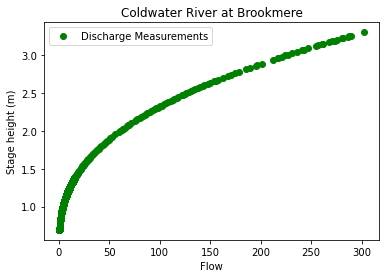

In [1040]:
# plot the discharge measurements on the x-axis, and the corresponding stage on the y axis
q_measured = 'Flow'
wl_measured = 'Stage'
stageflow_df.plot(q_measured, wl_measured, 
           marker='o', color='g',
           linestyle='',
           ylabel = 'Stage height (m)',
           label='Discharge Measurements',
           title = 'Coldwater River at Brookmere'
           )
plt.savefig("ogcurve.png", dpi=100)


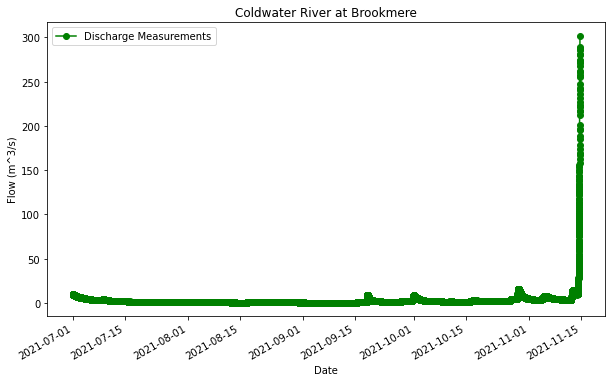

In [1041]:
q_measured = 'Flow'
wl_measured = 'Stage'
stageflow_df.plot('Date', q_measured,
                  marker='o', color='g',
                  figsize=(10, 6),
                  linestyle='-',
                  ylabel='Flow (m^3/s)',
                  label='Discharge Measurements',
                  title='Coldwater River at Brookmere'
                  )
plt.savefig("ogcurve.png", dpi=100)


C:\Users\brian\AppData\Local\Temp/ipykernel_46788/1256326056.py:6: RuntimeWarning: invalid value encountered in power
  return (a + (b/x) + (c/x**2) + (d**(np.log(x))) + (e**(2*np.log(x))) + (f**(3*np.log(x))))


These are the parameters we generated:  [-2.06254702 -0.18905681  0.03334039  0.88671084  0.9416485   1.08908298]


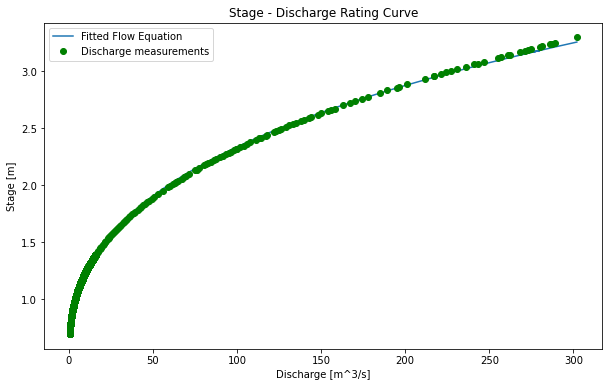

<Figure size 432x288 with 0 Axes>

In [1042]:
from scipy.optimize import curve_fit

stage_range = np.linspace(0.001, 2.5, 100)

#Change this bit around until it starts matching the data
def func1(x, a, b, c, d, e, f):
    return (a + (b/x) + (c/x**2) + (d**(np.log(x))) + (e**(2*np.log(x))) + (f**(3*np.log(x))))

xdata = stageflow_df[q_measured]
ydata = stageflow_df[wl_measured]

xdata = xdata.to_numpy()
ydata = ydata.to_numpy()

params, covs = curve_fit(func1, xdata, ydata)
#print(params, covs)

params, _ = curve_fit(func1, xdata, ydata)
a, b, c, d, e, f = params[0], params[1], params[2], params[3], params[4], params[5]

#This bit must match func1
yfit1 = (a + (b/xdata) + (c/xdata**2) + (d**(np.log(xdata))) + (e**(2*np.log(xdata))) + (f**(3*np.log(xdata))))

print("These are the parameters we generated: ", params)

#plt.plot(xdata, ydata, 'g-')
#plt.plot(xdata, yfit1, 'b-')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(xdata, yfit1, label='Fitted Flow Equation')
ax.plot(stageflow_df[q_measured].to_numpy(), stageflow_df[wl_measured].to_numpy(),
        marker='o', color='g',
        linestyle='',
        label='Discharge measurements')
ax.set_title('Stage - Discharge Rating Curve')
ax.set_xlabel('Discharge [m^3/s]')
ax.set_ylabel('Stage [m]')
ax.legend()
plt.show()
plt.savefig("fittedcurve.png", dpi = 100)
